<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 학습 목표

- 데이터프레임을 대상으로 기본적인 집계를 할 수 있습니다.
- 여러 데이터프레임을 연결할 수 있습니다.

# 7. 데이터프레임 집계

- 데이터프레임은 관계형 데이터베이스와 같은 집계가 가능합니다.
- 상세 데이터가 아닌 집계된 데이터에 대한 분석이 자주 요구되므로 익숙해져야 할 내용입니다.

In [0]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 7.1. Groupby

- 관계형 데이터베이스의 GROUP BY와 너무나 유사한 기능입니다.
- sum(), mean(), max(), min(), count() 메소드 사용해 특정 열을 기준으로 집계합니다.
- 평균을 구하는 메소드가 avg()가 아닌 mean() 임을 주의하기 바랍니다.

In [0]:
# 파일 다시 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(file_path, sep=',', skipinitialspace=True)  
graduate.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### 7.1.1. 합 구하기

- **as_index=True**를 설정(기본값)하면 집계 기준이 되는 열이 인덱스 열이 됩니다.
- **['gre'].sum()**과 같이 하면 결과가 **시리즈**가 됩니다.
- **[['gre']].sum()**과 같이 하면 결과가 **데이터프레임**이 됩니다.


In [0]:
# rank별 gre 합 조회 --> 시리즈
graduate.groupby(by='rank', as_index=True)['gre'].sum()

rank
1    37320
2    90000
3    69560
4    38200
Name: gre, dtype: int64

In [0]:
# rank별 gre 합 조회 --> 데이터프레임
graduate.groupby(by='rank', as_index=True)[['gre']].sum()

,gre
rank,
1,37320
2,90000
3,69560
4,38200


- **as_index=False**를 설정하면 행 번호를 기반으로 한 정수 값이 인덱스로 설정됩니다.

In [0]:
# rank별 gre 합 조회
graduate.groupby(by='rank', as_index=False)['gre'].sum()

,rank,gre
0,1,37320
1,2,90000
2,3,69560
3,4,38200


- 집계 결과를 새로운 데이터프레임으로 선언하여 사용하는 경우가 많습니다.
- 집계된 결과를 반복해서 사용하거나, 분석 대상이 되는 경우 데이터프레임으로 선언함이 유익합니다.

In [0]:
# rank별 gre 합 조회
gr_sum = graduate.groupby(by='rank', as_index=False)['gre'].sum()
gr_sum

,rank,gre
0,1,37320
1,2,90000
2,3,69560
3,4,38200


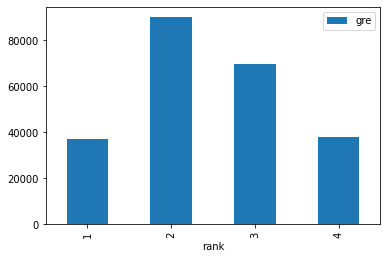

In [0]:
# bar chart 표시
gr_sum.plot(kind='bar', x='rank', y='gre')
plt.show()

- 여러 열에 대한 집계를 같이 할 수 있습니다.
- **[['gre', 'gpa']].sum()**과 같이 여려 열을 [[  ]] 안에 나열하면 됩니다.

In [0]:
# rank별 gre와 gpa 합 조회
gr_sum = graduate.groupby(by='rank', as_index=False)[['gre', 'gpa']].sum()
gr_sum

,rank,gre,gpa
0,1,37320,210.64
1,2,90000,507.61
2,3,69560,415.38
3,4,38200,222.33


- sum() 메소드 앞에 아무 열도 지정하지 않으면 모든 열에 대한 집계가 수행됩니다.

In [0]:
# rank별 나머지 열들 합 조회
gr_sum = graduate.groupby(by='rank', as_index=False).sum()
gr_sum

,rank,admit,gre,gpa
0,1,33,37320,210.64
1,2,54,90000,507.61
2,3,28,69560,415.38
3,4,12,38200,222.33


- **by=['rank', 'admit']** 과 같이 집계 기준 열을 여럿 설정할 수도 있습니다.

In [0]:
# rank별 나머지 열들 합 조회
gr_sum = graduate.groupby(by=['rank', 'admit'], as_index=False).sum()
gr_sum

,rank,admit,gre,gpa
0,1,0,16320,93.68
1,1,1,21000,116.96
2,2,0,56900,321.71
3,2,1,33100,185.90
4,3,0,52300,316.41
5,3,1,17260,98.97
6,4,0,30960,181.03
7,4,1,7240,41.30


### 7.1.2 평균, 최댓값, 최솟값, 개수 구하기 구하기

- **mean()** 메소드를 사용한다는 것 외에는 모든 것이 위 내용과 같습니다.

In [0]:
# rank별 gre 평균 조회
gr_mean = graduate.groupby(by='rank', as_index=False)['gre'].mean()  
gr_mean

,rank,gre
0,1,611.803279
1,2,596.026490
2,3,574.876033
3,4,570.149254


In [0]:
# rank + admit 별 나머지 모든 열 평균 조회
gr_mean = graduate.groupby(by=['rank', 'admit'], as_index=False).mean()  
gr_mean

,rank,admit,gre,gpa
0,1,0,582.857143,3.345714
1,1,1,636.363636,3.544242
2,2,0,586.597938,3.316598
3,2,1,612.962963,3.442593
4,3,0,562.365591,3.402258
5,3,1,616.428571,3.534643
6,4,0,562.909091,3.291455
7,4,1,603.333333,3.441667


- 최댓값, 최솟값, 개수도 메소드 차이만 있지, 사용 방법은 같습니다.

In [0]:
# rank별 gre 최댓값 조회
gr_max = graduate.groupby(by='rank', as_index=False)['gre'].max()  
gr_max

,rank,gre
0,1,800
1,2,800
2,3,800
3,4,800


In [0]:
# rank별 gre 최솟값 조회
gr_min = graduate.groupby(by='rank', as_index=False)['gre'].min()  
gr_min

,rank,gre
0,1,340
1,2,300
2,3,220
3,4,300


In [0]:
# rank별 gre 갯수 조회
gr_count = graduate.groupby(by='rank', as_index=False)['gre'].count()
gr_count

,rank,gre
0,1,61
1,2,151
2,3,121
3,4,67


## 7.2. Concat

- **concat()** 함수를 사용해 **인덱스 값을 기준으로** 두 데이터프레임을 가로 또는 세로로 합칠 수 있습니다.
- **axis=1** 옵션을 지정해 가로로 합칠 수 있습니다.
- **axis=0** 옵션을 지정해 세로로 합힐 수 있습니다.(기본값)

<img src='https://raw.githubusercontent.com/Jangrae/img/master/concat_ax1.png' width=500, align="left"/>

<img src='https://raw.githubusercontent.com/Jangrae/img/master/concat_ax0.png' width=400, align="left"/>

**1) 집계 결과를 갖는 데이터 프레임 만들기**

- 우선 **평균**을 구해 새로운 데이터프레임으로 선언했습니다.

In [0]:
# rank별 admit별 gre와 gpa 평균 조회
graduate1 = graduate.groupby(by=['rank', 'admit'], as_index=False)[['gre', 'gpa']].mean()
graduate1.head()

,rank,admit,gre,gpa
0,1,0,582.857143,3.345714
1,1,1,636.363636,3.544242
2,2,0,586.597938,3.316598
3,2,1,612.962963,3.442593
4,3,0,562.365591,3.402258


- 이어서 **개수**를 구해 새로운 데이터프레임으로 선언했습니다.

In [0]:
# rank별 admit 별 count 조회
graduate2 = graduate.groupby(by=['rank', 'admit'], as_index=False)['gre'].count()
graduate2.head()

,rank,admit,gre
0,1,0,28
1,1,1,33
2,2,0,97
3,2,1,54
4,3,0,93


**2) 열 이름 변경**

- 새롭게 만든 두 데이터프레임의 열 이름을 집계 결과임을 알기 쉽게 변경합니다.

In [0]:
# 열 이름 변경
graduate1.rename(columns={'gre':'gre_mean', 'gpa':'gpa_mean'}, inplace=True)
graduate1.head()

,rank,admit,gre_mean,gpa_mean
0,1,0,582.857143,3.345714
1,1,1,636.363636,3.544242
2,2,0,586.597938,3.316598
3,2,1,612.962963,3.442593
4,3,0,562.365591,3.402258


In [0]:
# 열 이름 변경
graduate2.rename(columns={'gre':'count'}, inplace=True)
graduate2.head()

,rank,admit,count
0,1,0,28
1,1,1,33
2,2,0,97
3,2,1,54
4,3,0,93


**3) 데이터프레임 가로로 합치기**

- 이제 **concat()** 함수를 사용해 두 데이터프레임을 합쳐봅니다.
- 가로로 합치므로 **axis=1** 옵션을 필히 지정해야 합니다.

In [0]:
# 모든 열 합치기
graduate_new = pd.concat([graduate1, graduate2], axis=1)
graduate_new

,rank,admit,gre_mean,gpa_mean,rank,admit,count
0,1,0,582.857143,3.345714,1,0,28
1,1,1,636.363636,3.544242,1,1,33
2,2,0,586.597938,3.316598,2,0,97
3,2,1,612.962963,3.442593,2,1,54
4,3,0,562.365591,3.402258,3,0,93
5,3,1,616.428571,3.534643,3,1,28
6,4,0,562.909091,3.291455,4,0,55
7,4,1,603.333333,3.441667,4,1,12


- 중복된 열이 있어 혼란스럽다면, 몇몇 열만 선택해서 합칠 수 있습니다.

In [0]:
# 일부 열 합치기
graduate_new = pd.concat([graduate1, graduate2['count']], axis=1)
graduate_new

,rank,admit,gre_mean,gpa_mean,count
0,1,0,582.857143,3.345714,28
1,1,1,636.363636,3.544242,33
2,2,0,586.597938,3.316598,97
3,2,1,612.962963,3.442593,54
4,3,0,562.365591,3.402258,93
5,3,1,616.428571,3.534643,28
6,4,0,562.909091,3.291455,55
7,4,1,603.333333,3.441667,12


## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>